In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import os

In [4]:
os.chdir('D:/SLIIT/Y3S2/MLOM/Labs/4/Cat&Dog Dataset')

In [5]:
cwd = os.getcwd()
print(cwd)

D:\SLIIT\Y3S2\MLOM\Labs\4\Cat&Dog Dataset


In [6]:
train_path = 'Training_data'
valid_path = 'Testing_data'

### Define the model

In [7]:
model = tf.keras.models.Sequential([
    #Note that input shape is the desired size of the image 300x300 with 3 bytes  color
    #This is the first convolution
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The second convolution
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    
    # The third convolution
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    
    # The fourth convolution
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    
    # The fifth convolution
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    
    # Flatten results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for class ('cat') and 1 for the other ('Dog')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#### first convolution

tf.keras.layers.Conv2D(...): These lines define convolutional layers in the model. Convolutional layers are used to extract features from images.

filters=16: The number of filters (also known as kernels) in the convolutional layer. Each filter learns different features.

kernel_size=3: The size of the convolutional kernel (3x3 in this case).

activation='relu': The activation function used after the convolution operation is Rectified Linear Unit (ReLU), which introduces non-linearity to the model.

input_shape=(300, 300, 3): Specifies the input shape of the first layer. In this case, it's a 300x300 pixel image with 3 color channels (RGB).

#### second convolution

tf.keras.layers.MaxPooling2D(...): These lines define max-pooling layers, which downsample the spatial dimensions of the feature maps. This helps reduce computational complexity.

pool_size=2: The size of the pooling window (2x2 in this case).


tf.keras.layers.Flatten(): This layer flattens the 2D feature maps from the previous convolutional layers into a 1D vector. This prepares the data for the fully connected (dense) layers.


tf.keras.layers.Dense(512, activation='relu'): This is a dense (fully connected) hidden layer with 512 neurons and ReLU activation. It adds non-linearity to the model and learns high-level features.


tf.keras.layers.Dense(1, activation='sigmoid'): This is the output layer with a single neuron and sigmoid activation. It's common in binary classification tasks where the model outputs a probability between 0 and 1.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 32)        0

### Compile the model

In [9]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### Train the model from generators

### Training

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All train images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_path,
                                                    #All images resized to 150x150
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    #Since we use binary_crossentropy loss, we need binary labels
                                                    class_mode='binary')

# All test images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale = 1./255)

# Apply predefined specification to test dataset
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size=(300,300),
                                            batch_size=32,
                                            class_mode='binary')

Found 633 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


For Training Data:

ImageDataGenerator is a Keras utility for data augmentation and preprocessing of image data.

rescale=1./255 scales the pixel values of the images in the training dataset to a range between 0 and 1 by dividing each pixel value by 255. This is a common preprocessing step for neural networks as it helps in training stability.

flow_from_directory is a method of ImageDataGenerator used to generate batches of training data from a directory of images.

'D:\\SLIIT\\Y3S2\\MLOM\\Labs\\4\\Cat&Dog Dataset\\Training_data' specifies the directory containing the training images.

target_size=(300, 300) resizes all training images to a target size of 300x300 pixels.

batch_size=32 determines the batch size for training. It means that the training data will be divided into batches of 32 images for each training step.

class_mode='binary' indicates that the labels are binary (e.g., 0 for cats, 1 for dogs).


For Testing Data:

flow_from_directory is used again to generate batches of test data from a different directory containing test images.

The parameters are similar to the training data generator.
    
    
These data generators are essential for efficiently loading and preprocessing large datasets during model training. They automatically handle tasks like resizing, rescaling, and batching, making it easier to work with image data in deep learning models.

In [13]:
# Train the model using generators
num_epochs = 10

history = model.fit(
             train_generator,
             epochs= num_epochs,
             validation_data=test_set
             )

Epoch 1/10
20/20 [==============================] - 20s 1000ms/step - loss: 0.6579 - accuracy: 0.6066 - val_loss: 0.7181 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 19s 969ms/step - loss: 0.6433 - accuracy: 0.6066 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 3/10
20/20 [==============================] - 19s 937ms/step - loss: 0.6283 - accuracy: 0.6382 - val_loss: 0.7245 - val_accuracy: 0.5000
Epoch 4/10
20/20 [==============================] - 19s 932ms/step - loss: 0.6006 - accuracy: 0.6682 - val_loss: 0.6208 - val_accuracy: 0.6850
Epoch 5/10
20/20 [==============================] - 19s 927ms/step - loss: 0.5797 - accuracy: 0.7062 - val_loss: 0.6643 - val_accuracy: 0.6250
Epoch 6/10
20/20 [==============================] - 20s 1s/step - loss: 0.5459 - accuracy: 0.7267 - val_loss: 0.6399 - val_accuracy: 0.6300
Epoch 7/10
20/20 [==============================] - 19s 951ms/step - loss: 0.5133 - accuracy: 0.7504 - val_loss: 0.8731 - val_accuracy: 0.5700
E

train_generator,: train_generator is an instance of tf.keras.preprocessing.image.ImageDataGenerator that generates batches of training data. It's used to provide training data to the model.

steps_per_epoch=100,: This parameter specifies the number of batches to draw from the training generator in each epoch. In this case, it's set to 100, meaning that in each epoch, the model will process 100 batches of training data.

epochs=10,: The number of training epochs is set to 10. An epoch is one complete pass through the entire training dataset. During training, the model will iterate over the dataset 10 times, each time updating its weights.

validation_data=validation_generator,: validation_generator is another instance of tf.keras.preprocessing.image.ImageDataGenerator that generates batches of validation data. Validation data is used to evaluate the model's performance during training and prevent overfitting.

validation_steps=50): Similar to steps_per_epoch, this parameter specifies the number of batches to draw from the validation generator in each epoch for evaluation. It's set to 50, so the model will evaluate its performance on 50 validation batches in each epoch.

In [14]:
import matplotlib.pyplot as plt

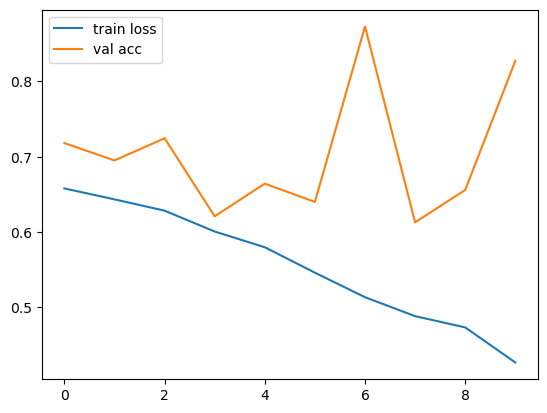

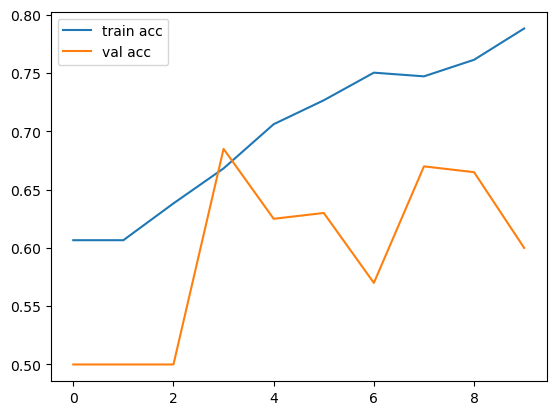

<Figure size 640x480 with 0 Axes>

In [15]:
#plot the loss

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val acc')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')